In [17]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file_chrom(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file, one chrom
    input: vcf file
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_list=[]  
    
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]            # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                           # genomic position of variants
            var_pos_list.append(var_pos)
    return var_pos_list


In [70]:
folder = "/scratch/smajidi1/hac/"
vcf_file_address = folder+ "hprc_chr22.vcf"
var_pos_list = read_vcf_file_chrom(vcf_file_address)

diff_list = []
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    diff_list.append(diff)
    
print("Number of variants in the VCF is ",len(diff_list)+1)
print("Mean of genomic distance", round(np.mean(diff_list),3),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

print("Max could be due to N positions.")


Number of variants in the VCF is  98943
Mean of genomic distance 407.288 bp, max distance 2512818 bp, and min distance is 1
Max could be due to N positions.


In [79]:
max_value=np.max(diff_list)
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    if diff== max_value:
        print("The max distance is happening between variants indecis",i-1,"and the next one, which are at positions",var_pos_list[i-1],"and", var_pos_list[i])


The max distance is happening between variants indecis 18266 and the next one, which are at positions 12641590 and 15154408


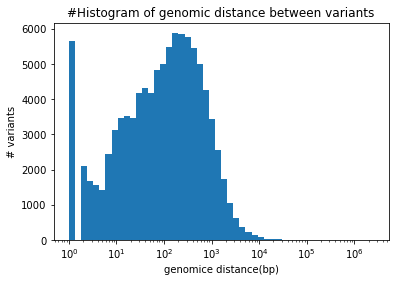

In [80]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.xscale('log')

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")
plt.show()

Text(0, 0.5, '# variants')

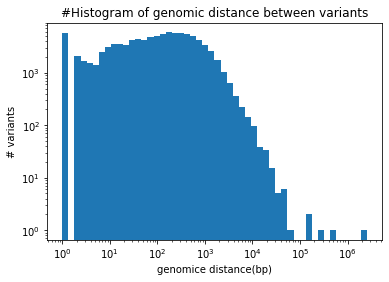

In [81]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.loglog()

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")


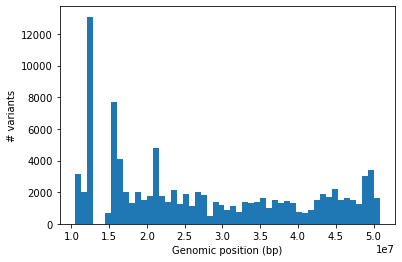

In [82]:

step= 1e6
num_bucket= int(np.max(var_pos_list)/step)+1


plt.hist(var_pos_list, bins=num_bucket)
plt.ylabel("# variants")
plt.xlabel("Genomic position (bp)")
plt.show()


In [100]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: ordered vcf file (based on chr and position)
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_chrom_list = []
    var_pos_allchrom_list = []
    chrom_list=[]
    
    previous_chrom  = ""
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]       # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                       # genomic position of variants
            
            if chrom != previous_chrom:                        # new chromosome started  in the VCF file
                chrom_list.append(chrom)
                if var_pos_chrom_list:           # not empty
                    var_pos_allchrom_list.append(var_pos_chrom_list)                
                var_pos_chrom_list = [var_pos]
            else:                                                  
                var_pos_chrom_list.append(var_pos)                
            
            previous_chrom = chrom
    # add the last chr
    var_pos_allchrom_list.append(var_pos_chrom_list)                
                
            
    return chrom_list, var_pos_allchrom_list


In [130]:
pwd

'/work/FAC/FBM/DBC/cdessim2/default/smajidi1'

In [131]:
folder = "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/other/hack22/"
vcf_file_address = folder+ "HPRC-cur.20211005-align2-GRCh38.dip.vcf"  #"hprc_chr22.vcf"
chrom_list, var_pos_allchrom_list = read_vcf_file(vcf_file_address)


In [109]:
len(var_pos_allchrom_list), len(var_pos_allchrom_list[0]), len(var_pos_allchrom_list[-1])

(24, 424478, 80000)

In [114]:
diff_list_allchrom =[]
for chrom_idx, chrom in enumerate(chrom_list):
    print("***")
    print("working on chr", chrom)
    var_pos_list = var_pos_allchrom_list[chrom_idx]
    diff_list = []
    for i in range(1,len(var_pos_list)):
        diff = var_pos_list[i]-var_pos_list[i-1]
        diff_list.append(diff)
        
    diff_list_allchrom.append(diff_list)
    print("Number of variants in the VCF is ",len(diff_list)+1)
    print("Mean of genomic distance", round(np.mean(diff_list),1),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

    print("Max could be due to N positions.")


***
working on chr chr1
Number of variants in the VCF is  424478
Mean of genomic distance 585.1 bp, max distance 18014299 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr2
Number of variants in the VCF is  394092
Mean of genomic distance 614.5 bp, max distance 2004169 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr3
Number of variants in the VCF is  374386
Mean of genomic distance 529.5 bp, max distance 695999 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr4
Number of variants in the VCF is  387661
Mean of genomic distance 490.3 bp, max distance 534234 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr5
Number of variants in the VCF is  335899
Mean of genomic distance 540.2 bp, max distance 2652960 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr6
Number of variants in the VCF is  327966
Mean of genomic distance 520.2 bp, m

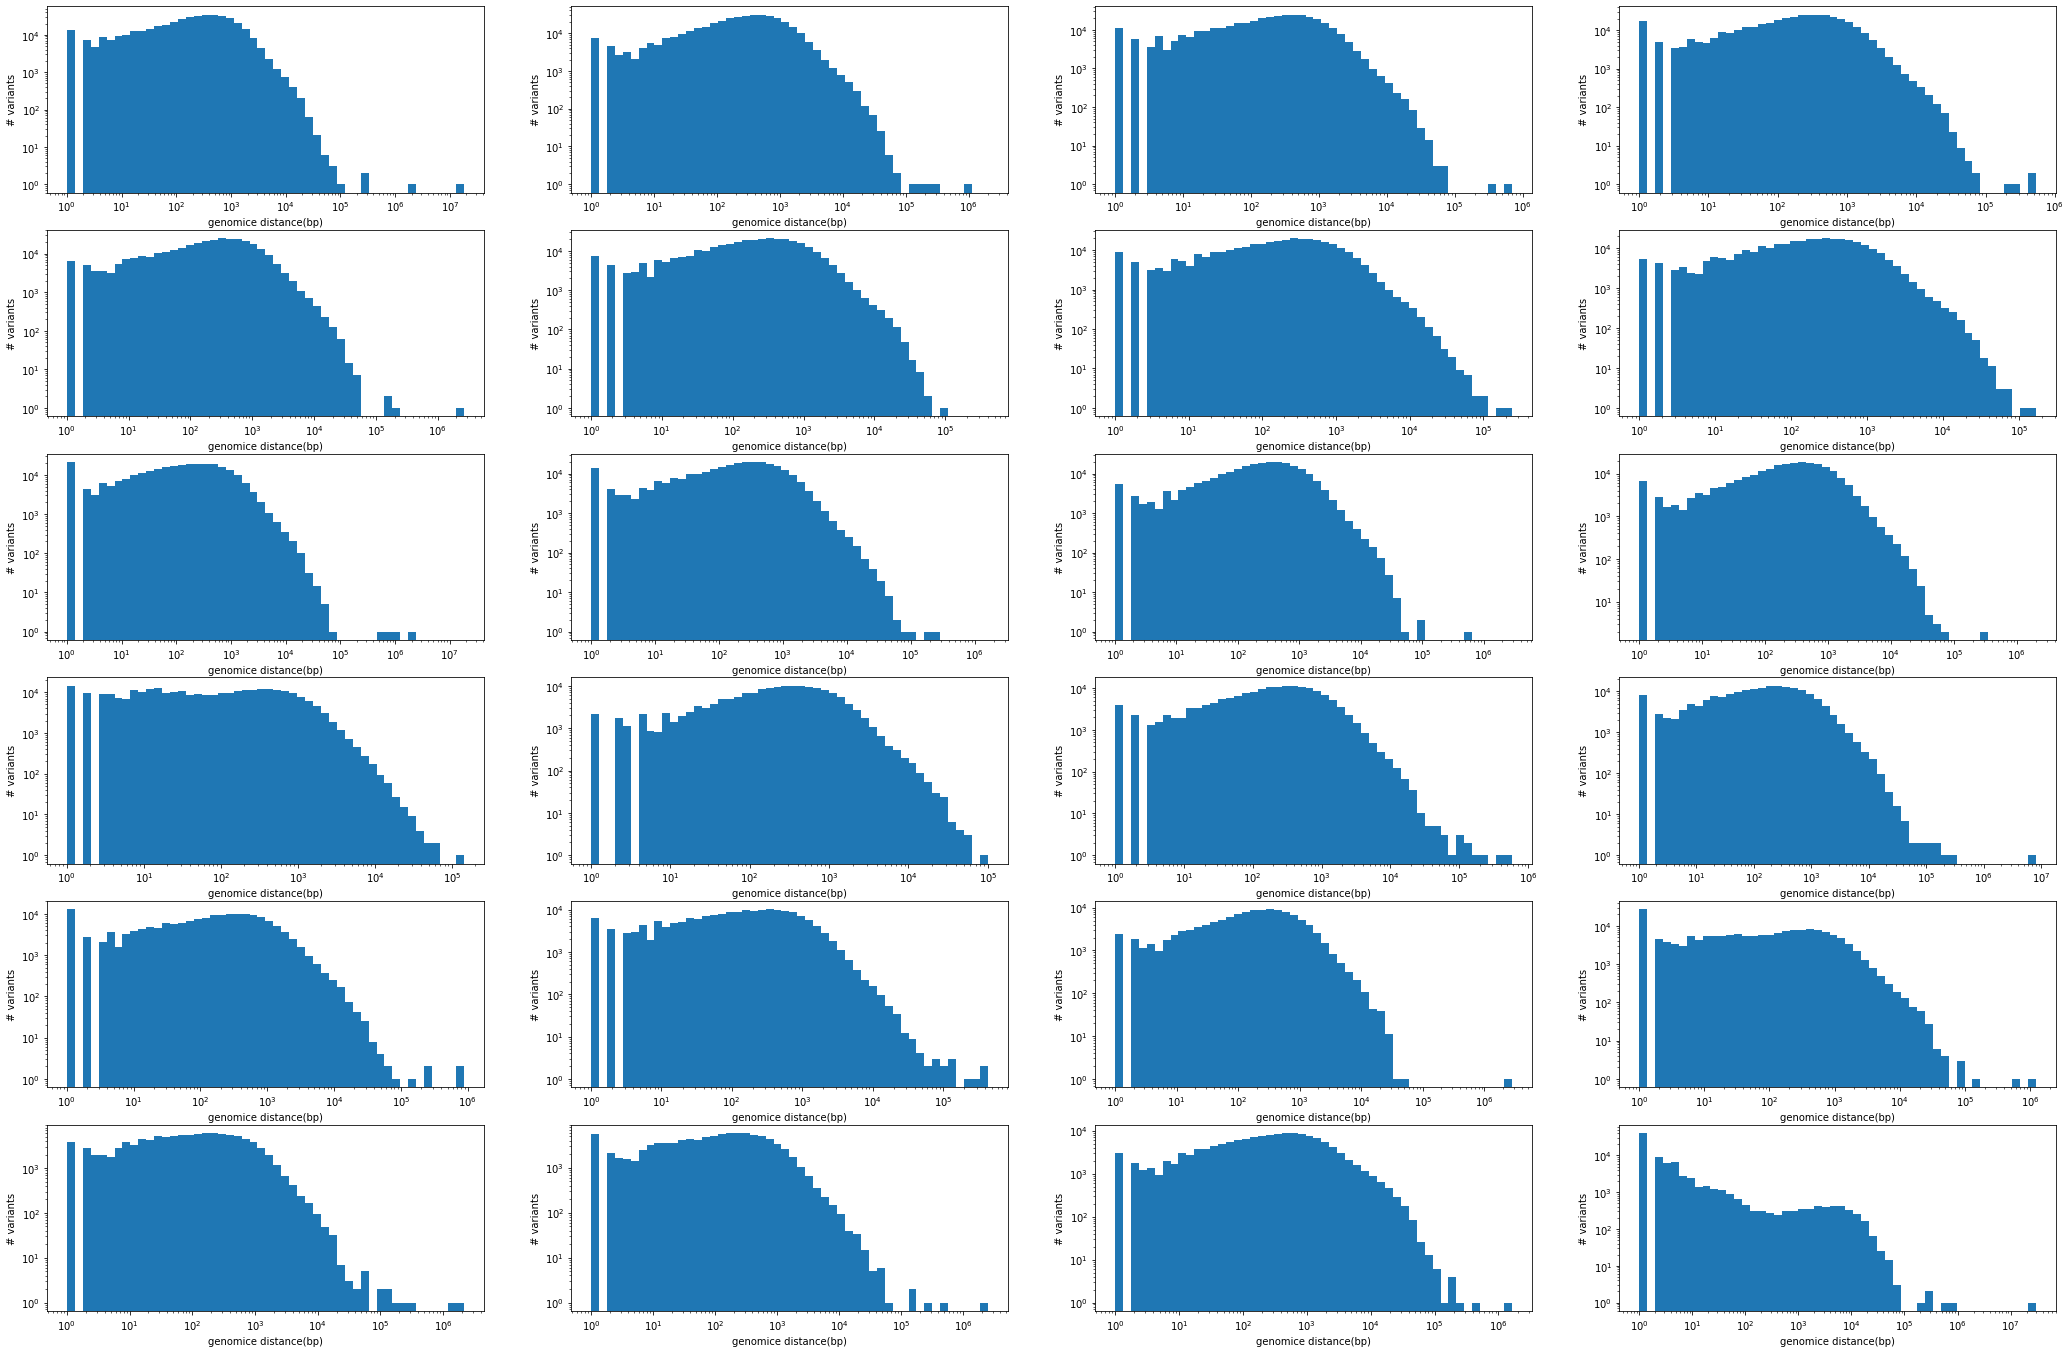

In [136]:

dim1=6
dim2=4

fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(diff_list_allchrom)):
    
    diff_list = diff_list_allchrom[chrom_idx]
    plt.subplot(dim1, dim2, chrom_idx+1 )

    hist, bins = np.histogram(diff_list, bins=50)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(diff_list, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')

    #plt.title('#Histogram of genomic distance between variants')
    plt.xlabel("genomice distance(bp)")
    plt.ylabel("# variants")

# plt.show()
tight_layout() 
plt.savefig(folder+"hist_chrs.pdf")

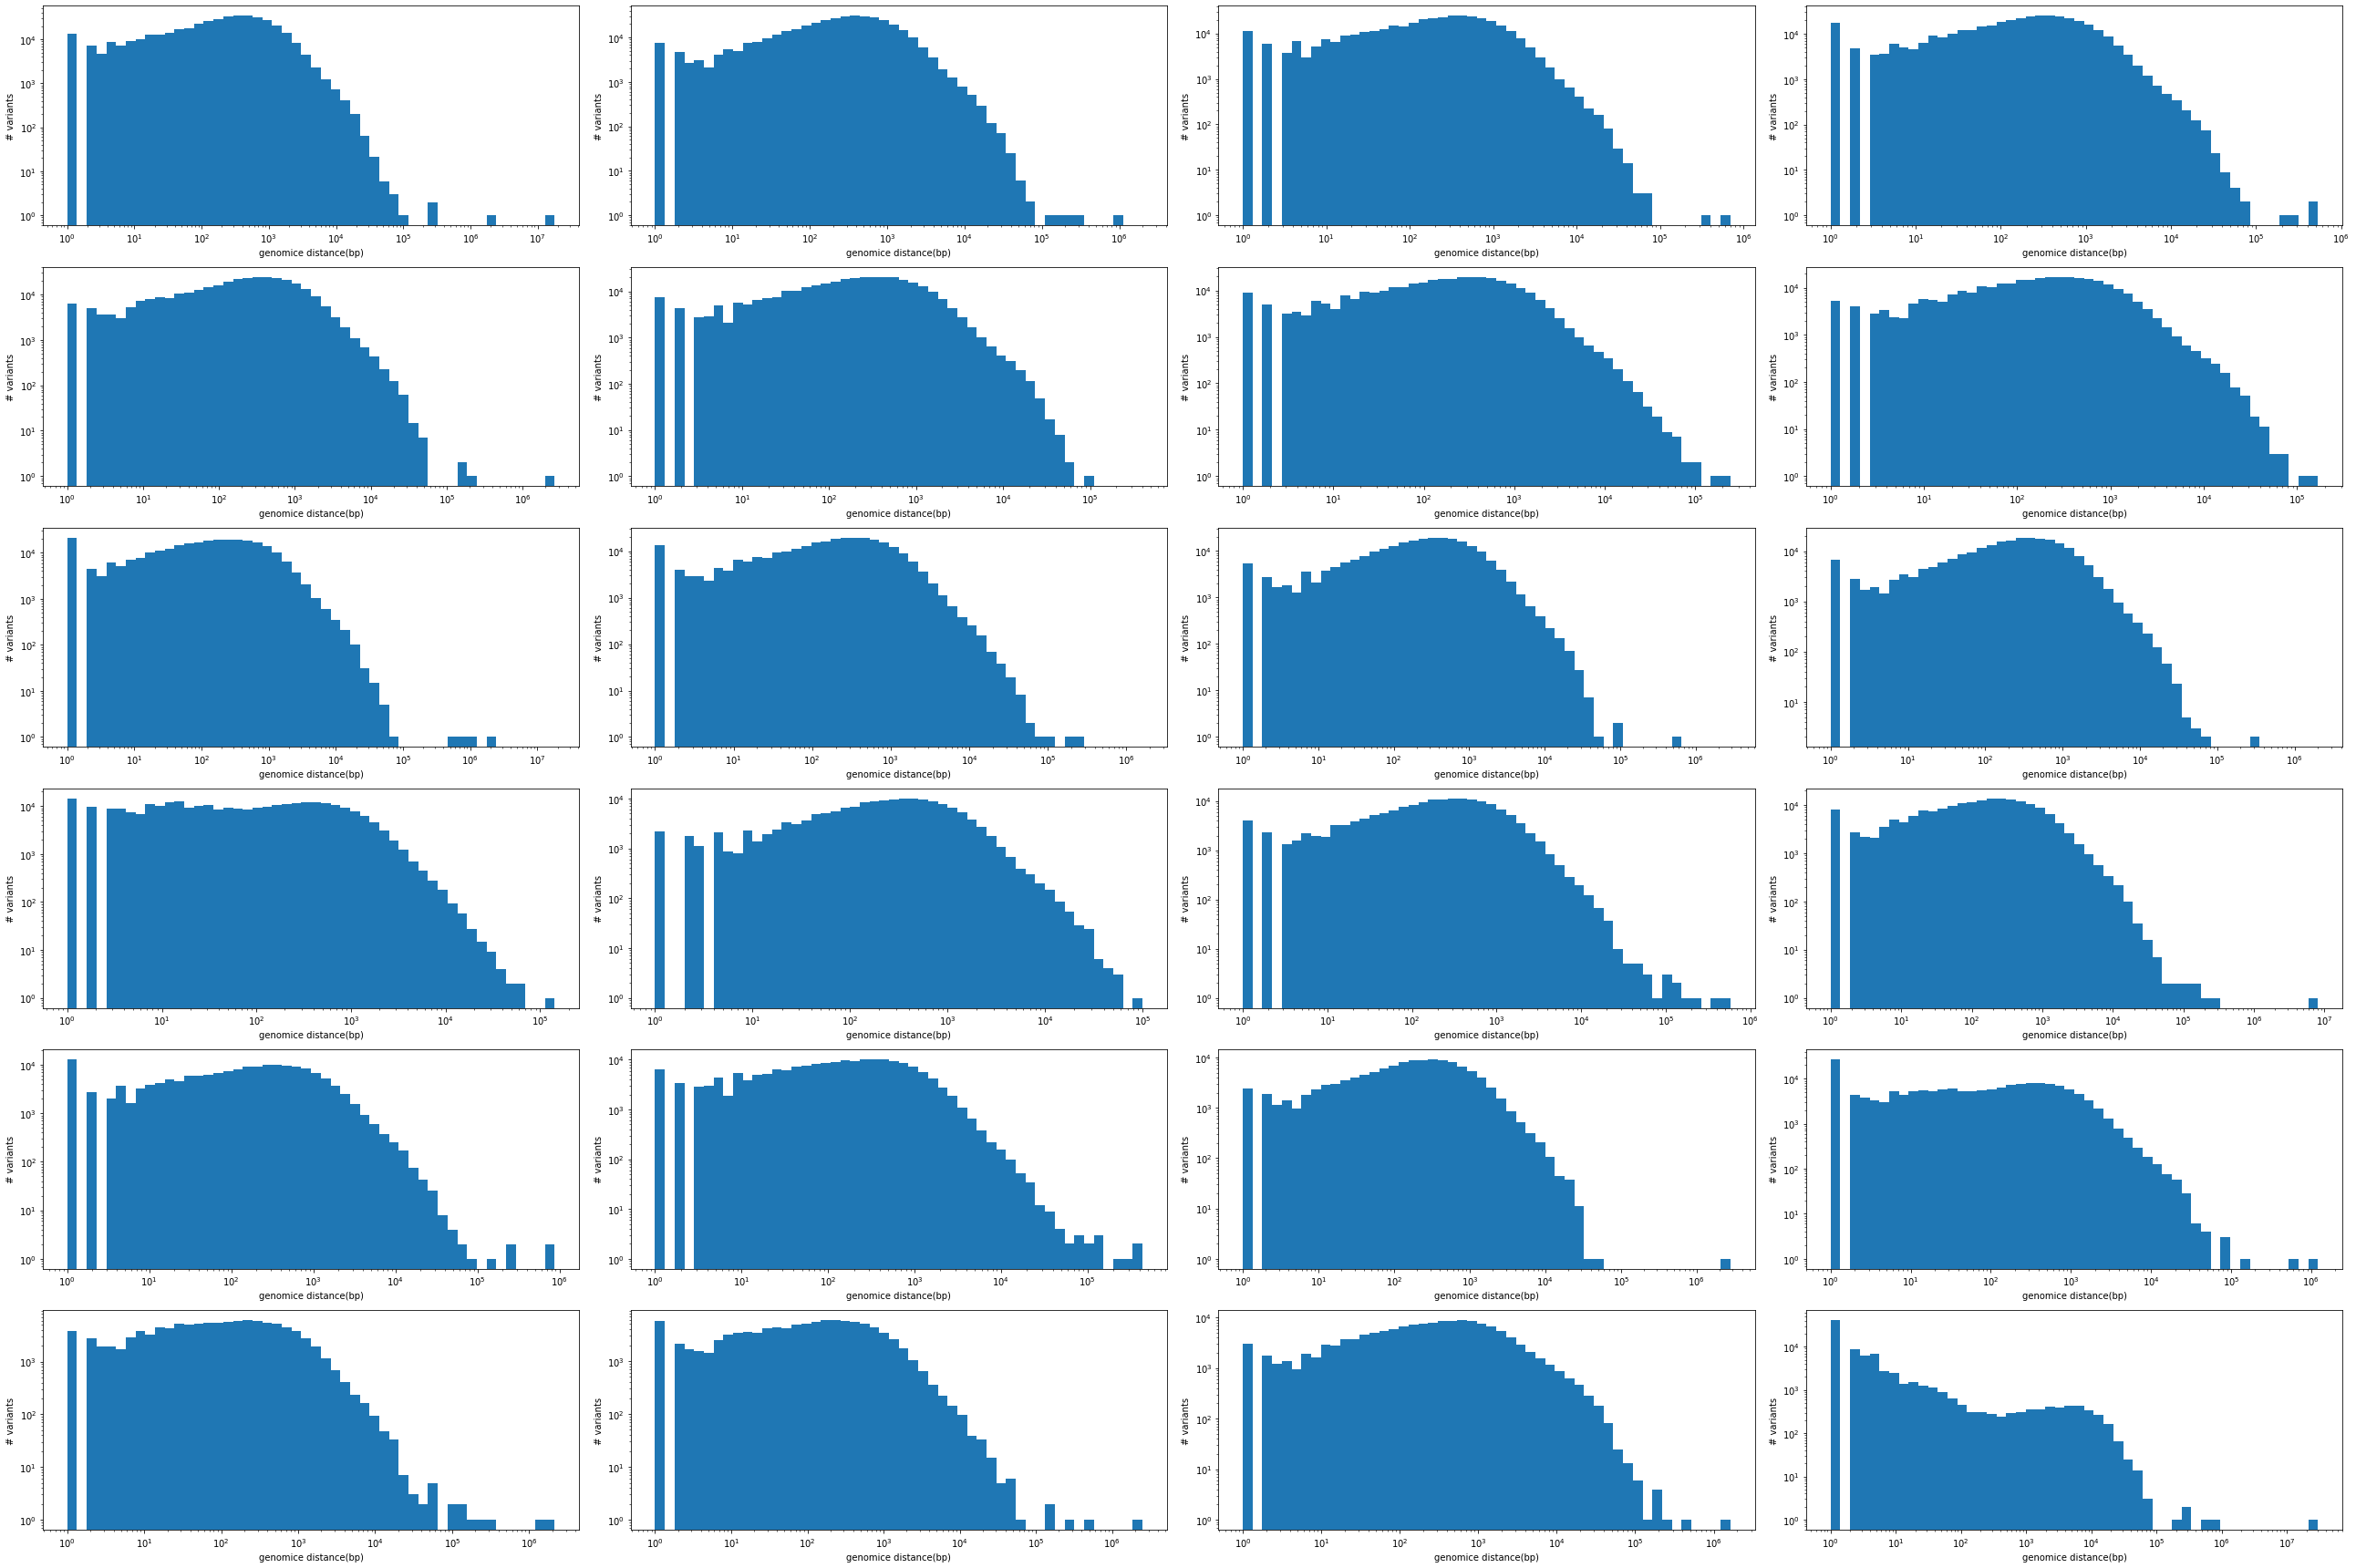

In [138]:

dim1=6
dim2=4

fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(diff_list_allchrom)):
    
    diff_list = diff_list_allchrom[chrom_idx]
    plt.subplot(dim1, dim2, chrom_idx+1 )

    hist, bins = np.histogram(diff_list, bins=50)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(diff_list, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')

    #plt.title('#Histogram of genomic distance between variants')
    plt.xlabel("genomice distance(bp)")
    plt.ylabel("# variants")

# plt.show()
plt.tight_layout() 
plt.savefig(folder+"hist_chrs_variant_distance.pdf")

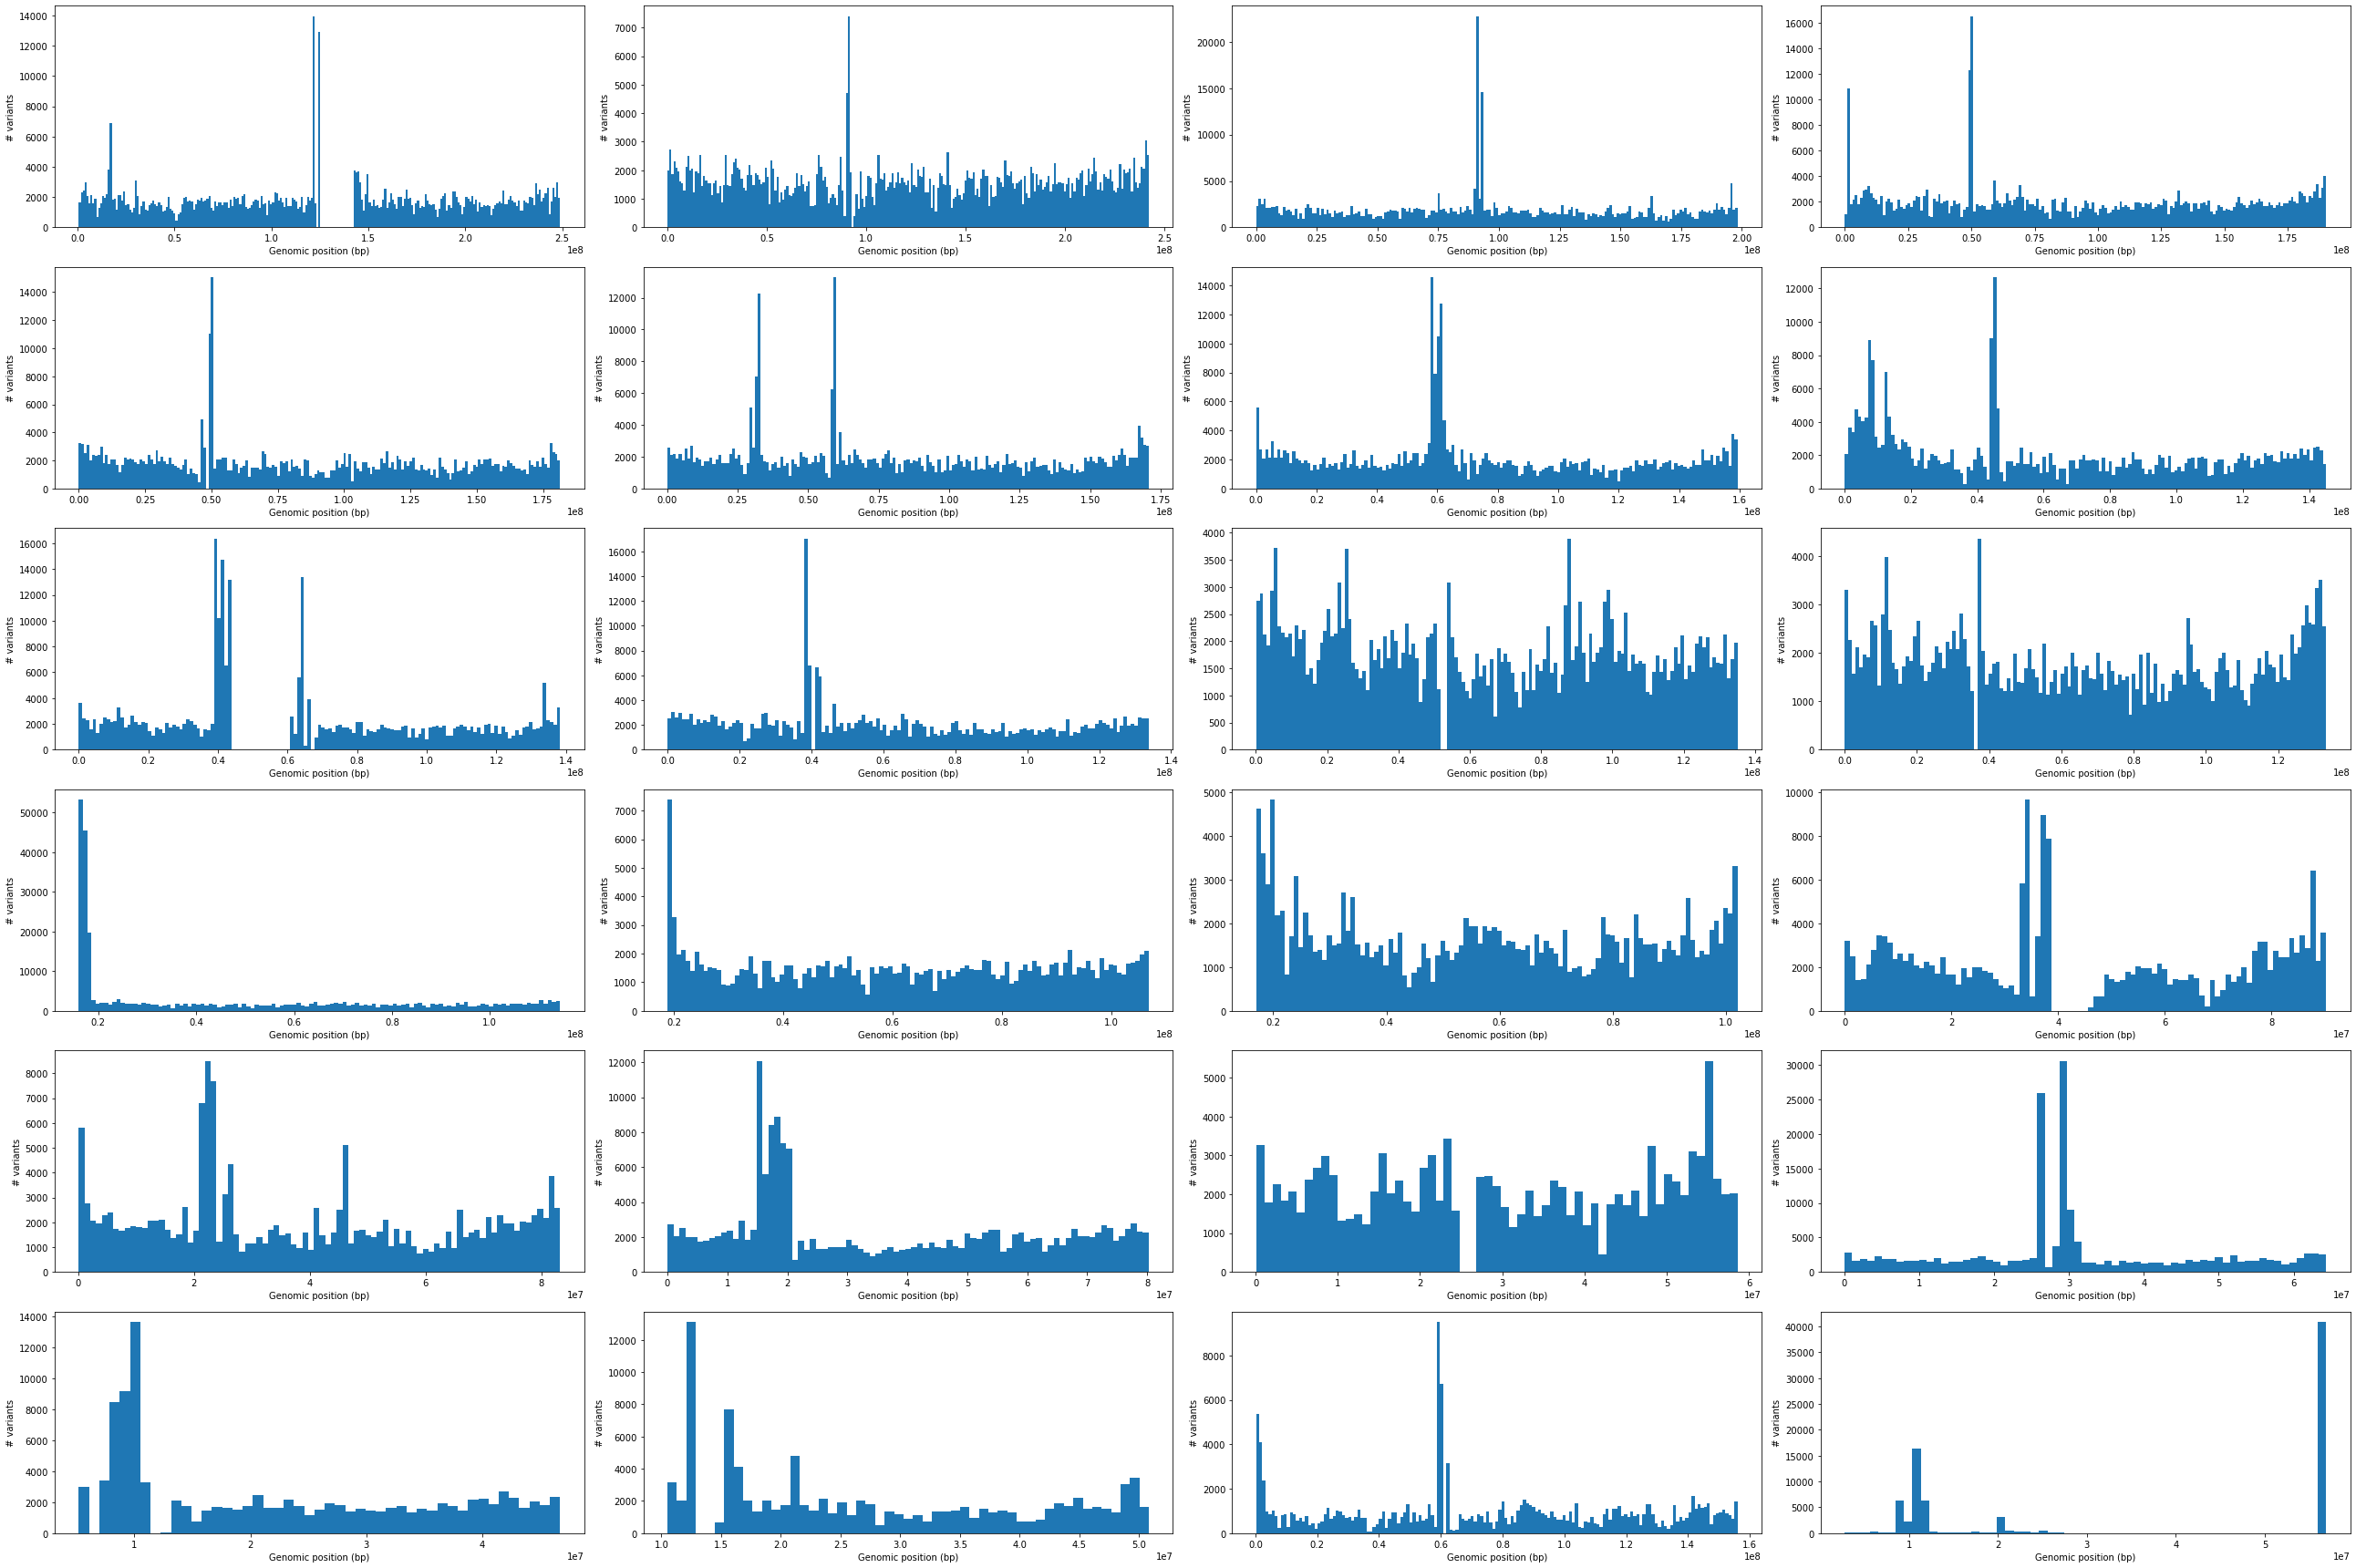

In [139]:
step= 1e6

dim1=6
dim2=4
fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(var_pos_allchrom_list)):
    var_pos_chrom = var_pos_allchrom_list[chrom_idx] 
    num_bucket= int(np.max(var_pos_chrom)/step)+1
    
    plt.subplot(dim1, dim2, chrom_idx+1 )
    plt.hist(var_pos_chrom, bins=num_bucket)
    plt.ylabel("# variants")
    plt.xlabel("Genomic position (bp)")
#plt.show()
plt.tight_layout() 

plt.savefig(folder+"hist_chrs_variant_position.pdf")